In [2]:
%run "0. config.ipynb"

1887


In [27]:
players_stats = pd.DataFrame.from_csv("data/players_stats.csv", encoding="utf8")

# profiling players that complete the game

In [28]:
players_stats[ (players_stats["complete"] == 1) & (players_stats["adventure"] == True) ].mean()

complete                1.000000
configure               0.000000
craft                   1.086957
death                   6.608696
equip                   3.434783
gotomooc                0.000000
gotourl                 0.434783
pickup                  3.086957
reach                   8.130435
restart                 0.043478
selectmenu              1.173913
start                   0.478261
switch                  0.000000
unequip                 0.478261
duration (seconds)    710.478261
max_reach               8.000000
adventure               1.000000
sandbox                 0.000000
dtype: float64

# simple decision tree

In [3]:
from sklearn import tree

In [5]:
players_stats.head(5)

,complete,configure,craft,death,equip,gotomooc,gotourl,pickup,reach,restart,selectmenu,start,switch,unequip,duration (seconds),max_reach,adventure,sandbox
playerId,,,,,,,,,,,,,,,,,,
0023dbb1-7f98-4cdb-8122-722f801f40b3,0,1,0,3,0,0,0,1,2,0,1,0,0,0,175,2,True,False
01b0c435-f0c0-4bfd-9189-86fc0d29b163,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False
02bc076b-32aa-467a-bbc6-b746abedb7bd,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False
02c6953a-0417-4858-8efb-1989be9f6b9d,0,1,0,0,0,0,0,0,1,0,2,1,1,0,19,1,False,True
0306db66-081d-4035-b30f-8358469d6ec3,1,0,3,17,8,0,1,5,12,1,2,0,0,2,1030,8,True,False


In [6]:
print len(players_stats)
print len(players_stats.drop_duplicates())

players_stats = players_stats.drop_duplicates()

143
95


In [17]:
from sklearn import tree

X = players_stats[ [ c for c in players_stats.columns if c not in [ "complete" ] ] ].as_matrix()
X = X.astype(int)

Y = players_stats["complete"].as_matrix()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

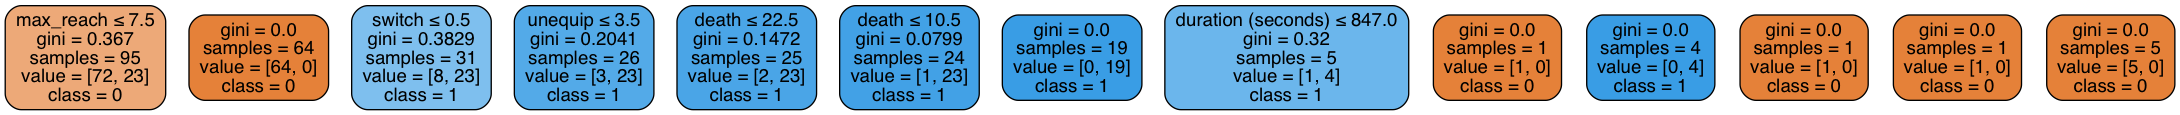

In [18]:
from IPython.display import Image  
from StringIO import StringIO

import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=[ c for c in players_stats.columns if c not in [ "complete" ] ],  
                         class_names= [ str(c) for c in range(0,2) ],
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [26]:
X_uncompleted = players_stats[ players_stats["complete"] == 0 ]
X_uncompleted = X_uncompleted.drop_duplicates()

print len(X_uncompleted)

X_uncompleted = X_uncompleted[ [ c for c in players_stats.columns if c not in [ "complete" ] ] ].as_matrix()

p = clf.predict(X)

print sum(p)

72
23.0


In [20]:
players_coordinates = pd.DataFrame.from_csv("data/players_coordinates.csv")

In [21]:
l = [ i for i, y in enumerate(p) if y == 1 ]

print len(l)

23


6


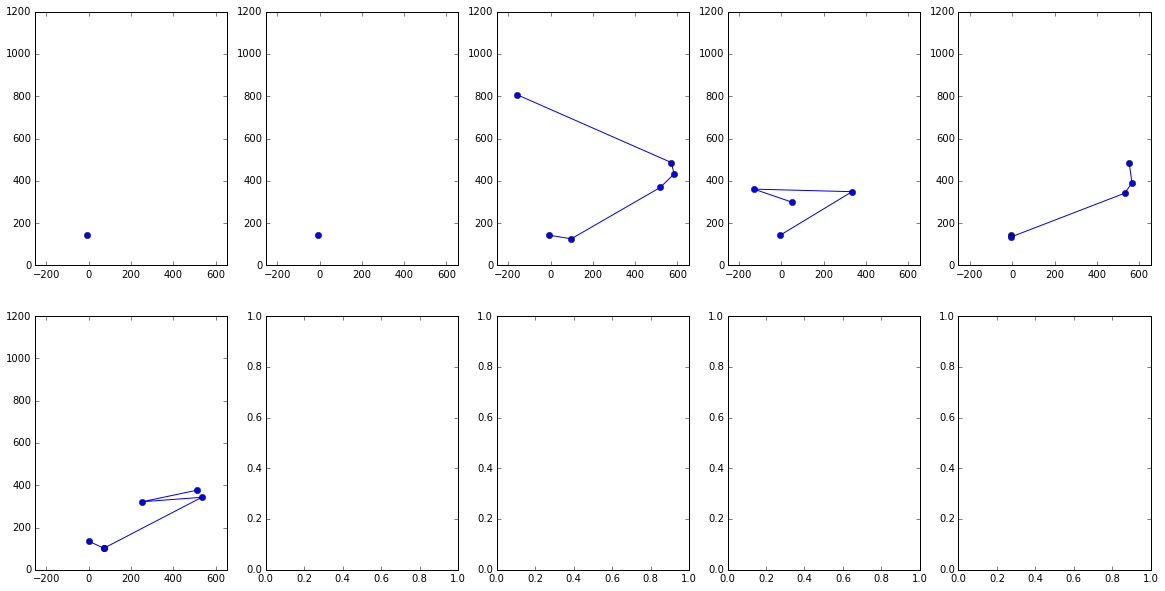

In [23]:
df = players_coordinates.iloc[l,:]
df = df[ df["y"] < 1500 ]

print len(df.index.unique())

players_list = list(df.index.unique())
plt.figure()

f, axarr = plt.subplots(len(players_list)/5+1, 5, figsize=(20,10))

for i, p in enumerate(players_list):
  select = df.loc[p,:]

  # print i
  
  ax = axarr[i/5, i%5]

  x = select["x"]
  y = select["y"]
  
  ax.plot(x,y, "-o")
  ax.axis('equal')

  ax.set_xlim([-300, 700])
  ax.set_ylim([0, 1200])

plt.show();

# sequential approach

Create data with progression within games instead of just finished games